### Analiza zasięgu kampanii marketingowej w social mediach przy współpracy z influencerami

Przesiębiorstwo rozważa podjęcie współpracy z 10 gumisiami-blogerami (inluencerami) w celu promocji swojego nowego produktu <b>P2</b>. 

Załączony plik przedstawia wyniki ankiety, w której 1000 respondentów odpowiadało na pytanie, czy w ostatnim tygodniu widziało reklamę innego produktu <b>P</b> przedsiębiorstwa w mediach społecznościowych 10 analizowanych gumisiów (każdy respondent mógł widzieć reklamę produktu P1 w social mediach u 0, 1, 2 aż do 10 influencerów). Niestety aktualny budżet nie pozwala na zakup reklamy u wszystkich 10 blogerów, lecz wyłącznie u 5.

Na podstawie ankiety chcemy przeanalizować indywidualne (każdego influencera z osobna) oraz grupowe (w poszczególnych podgrupach 2, 3... influencerów) zasięgi  *blogerów* wśród respondentów (możliwości dotarcia rozumiane jako zobaczenie reklamy). 
***Zasięg mediowy jest wskaźnikiem pokazującym odsetek osób, który miał kontakt z wybraną reklamą w wybranym okresie czasowym. Celem kampanii jest maksymalizacja takiego zasięgu - chcemy, by jak największa liczba respondentów zobaczyła reklamę u minimum 1 influencera (blogera). Jeżeli zasięg kampanii wynosi np. 90%, oznacza to, że 90% (900 z 1000) respondentów widziało reklamę danego produktu choć raz w mediach społecznościowych analizowanych influencerów.***

## Spis treści
- [1 - Importing Libraries](#1)
- [2 - Loading Dataframe](#2)
- [3 - Data Cleaning](#3)
- [4 - Data Analysis](#4)

<a name='1'></a>
## 🔷 Importing Libraries

In [1]:
import itertools
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib as mat
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"Sklearn version: {skl.__version__}")
print(f"Matplotlib version: {mat.__version__}")
print(f"Seaborn version: {sns.__version__}")

Pandas version: 1.4.2
Numpy version: 1.21.5
Sklearn version: 1.0.2
Matplotlib version: 3.5.1
Seaborn version: 0.11.2


<b>Moje Wersje Bibliotek:</b><br>

- Pandas version: 1.4.2<br>
- Numpy version: 1.21.5<br>
- Sklearn version: 1.0.2<br>
- Matplotlib version: 3.5.1<br>
- Seaborn version: 0.11.2<br>

<a name='2'></a>
## 🔷 Loading Dataframe

In [2]:
# Wczytanie danych z poprawnymi parametrami
df = pd.read_csv('Zadanie_rekrutacyjne.csv', sep=";", index_col=0)

# Wyświetlenie pierwszych wierszy
df.head()

,Zummi,Gruffi,Grammi,Tummi,Sunni,Cubbi,Sir Thornberry,Gusto,Chummi,Sir Gallant
0,Nie Widział,Nie Widział,Nie Widział,Nie Widział,Widział,Widział,Nie Widział,Nie Widział,Nie Widział,Nie Widział
1,Widział,Nie Widział,Widział,Widział,Widział,Widział,Nie Widział,Widział,Nie Widział,Widział
2,Widział,Nie Widział,Widział,Nie Widział,Widział,Widział,Widział,Widział,Nie Widział,Widział
3,Nie Widział,Nie Widział,Nie Widział,Widział,Widział,Nie Widział,Nie Widział,Nie Widział,Nie Widział,Nie Widział
4,Widział,Widział,Widział,Nie Widział,Nie Widział,Widział,Nie Widział,Nie Widział,Widział,Widział


Z tego co widać na pierwszy rzut oka to dane składają się ze stringów 'Widział' i 'Nie Widział' co trzeba będzie zakodować przez analizą.

In [3]:
# Sprawdzanie wymiarów danych
df.shape

(1000, 10)

Dane posiadaja 1000 wierszy(respondentów) i 10 kolumn(influencerów) tak jak w poleceniu.

In [4]:
# Sprawdzenie typów kolumn
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Zummi           984 non-null    object
 1   Gruffi          984 non-null    object
 2   Grammi          979 non-null    object
 3   Tummi           989 non-null    object
 4   Sunni           979 non-null    object
 5   Cubbi           985 non-null    object
 6   Sir Thornberry  985 non-null    object
 7   Gusto           987 non-null    object
 8   Chummi          982 non-null    object
 9   Sir Gallant     986 non-null    object
dtypes: object(10)
memory usage: 85.9+ KB


Wszyzstkie typy są obiektem co nie jest zaskoczeniem.

<a name='3'></a>
## 🔷 Data Cleaning
- Radzenie sobie z brakującymi wartościami
- Kodowanie (Widział': 1, 'Nie Widział': 0)

### Radzenie sobie z brakującymi wartościami
Imputacja brakujących wartości

In [5]:
# Sprawdzenie braków danych
df.isnull().sum()

Zummi             16
Gruffi            16
Grammi            21
Tummi             11
Sunni             21
Cubbi             15
Sir Thornberry    15
Gusto             13
Chummi            18
Sir Gallant       14
dtype: int64

Jak widzimy każda kolumna zawiera kilka brakujących wartości.<br>

Imputowanie lub przewidywanie tego czy dany respondent widział produkt P1 nie wchodzi w gre, ponieważ nie posiadamy wystarczającej ilości informacji(dobrych cech) aby w 100% przewidizeć że produkt P1 był widziany przez danego respondenta.
<b>Jako że interesuje nas informacja czy respondent widział produkt P1, wartości NaN powinny być zamienione na "Nie Widział".</b> Usunięcie wierszy z brakującymi wartościami może spowodować utratę informacji o tym czy respondent widział produkt u influencerów.

In [6]:
# Zamiana wartości NaN na "Nie Widział"
df_filled = df.fillna('Nie Widział')

# Ponowne sprawdzenie brakujących wartości
df_filled.isnull().sum()

Zummi             0
Gruffi            0
Grammi            0
Tummi             0
Sunni             0
Cubbi             0
Sir Thornberry    0
Gusto             0
Chummi            0
Sir Gallant       0
dtype: int64

Jak widać nie mamy jużbrakujących wartości.

### Kodowanie (Widział': 1, 'Nie Widział': 0)

W tym kroku koduje wartości: Widział' na 1, 'Nie Widział' na 0

In [7]:
import pandas as pd

# Mapowanie wartości 'Widział' na 1 i 'Nie Widział' na 0
df_mapped = df_filled.replace({'Widział': 1, 'Nie Widział': 0})

# Wyświetlanie danych po mapowaniu
df_mapped.head()

,Zummi,Gruffi,Grammi,Tummi,Sunni,Cubbi,Sir Thornberry,Gusto,Chummi,Sir Gallant
0,0,0,0,0,1,1,0,0,0,0
1,1,0,1,1,1,1,0,1,0,1
2,1,0,1,0,1,1,1,1,0,1
3,0,0,0,1,1,0,0,0,0,0
4,1,1,1,0,0,1,0,0,1,1


Jak widać dane wyglądają poprawnie<br>
Sprawdzimy jeszcze czy nie było jakichś innych wartości za pomocą metody info()

In [8]:
# Sprawdzenie typów danych po mapowaniu
df_mapped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Zummi           1000 non-null   object
 1   Gruffi          1000 non-null   object
 2   Grammi          1000 non-null   object
 3   Tummi           1000 non-null   object
 4   Sunni           1000 non-null   object
 5   Cubbi           1000 non-null   object
 6   Sir Thornberry  1000 non-null   object
 7   Gusto           1000 non-null   object
 8   Chummi          1000 non-null   object
 9   Sir Gallant     1000 non-null   object
dtypes: object(10)
memory usage: 85.9+ KB


Jak widać w naszysch danych występują nadal jakieś niechciane wartości.<br>
Zamierzam sprawdzić unikalne wartości każdej z kolumn.

In [9]:
# Uzyskanie unikalnych wartości dla każdej kolumny
df_mapped.apply(pd.Series.unique)

,Zummi,Gruffi,Grammi,Tummi,Sunni,Cubbi,Sir Thornberry,Gusto,Chummi,Sir Gallant
0,0,0,0,0,1,1,0,0,0,0
1,1,1,1,1,0,0,1,1,1,1
2,Widzial,Widzial,nie,nie widzial,Widzial,nie widzial,Widzial,Widzi al,nie widzial,Widzial
3,Widzi al,nie widzial,nie widzial,tak,nie,Widzial,tak,Widzial,Widzial,nie widzial
4,nie widzial,nie,Widzial,Widzi al,nie widzial,tak,Widzi al,nie widzial,nie,nie
5,nie,Widzi al,tak,Widzial,tak,nie,nie widzial,tak,Widzi al,Widzi al
6,tak,tak,Widzi al,nie,Widzi al,Widzi al,nie,nie,tak,tak


Na powyższej tabeli widać że występują inne wartości poza 'Widział' i 'Nie Widział'<br>
Patrząc na nie można zauważyć że da się je skategoryzować używając słowa "nie", gdzie jeśli string zaczyna się od "nie" mapujemy 0 inaczej 1

In [10]:
# Funkcja do mapowania wartości na 1 lub 0
def map_value(value):
    if isinstance(value, str):
        if value.startswith('nie'):
            return 0
        else:
            return 1
    else:
        return value

# Zastosowanie funkcji do każdej wartości
respondents = df_mapped.applymap(map_value)

# Sprawdzenie typów danych po mapowaniu
respondents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Zummi           1000 non-null   int64
 1   Gruffi          1000 non-null   int64
 2   Grammi          1000 non-null   int64
 3   Tummi           1000 non-null   int64
 4   Sunni           1000 non-null   int64
 5   Cubbi           1000 non-null   int64
 6   Sir Thornberry  1000 non-null   int64
 7   Gusto           1000 non-null   int64
 8   Chummi          1000 non-null   int64
 9   Sir Gallant     1000 non-null   int64
dtypes: int64(10)
memory usage: 85.9 KB


Wszystkie wartości są numeryczne. Dane są gotowe do analizy

<a name='4'></a>
## 🔷 Data Analysis

- Macierz korelacji
- Podobieństwo blogerów
- Ilu respondentów nie widziało produktu P1?
- Ile wynosi zasięg wybranego gumisia-blogera (każdego z osobna)?
- Ile wynosi łączny zasięg wybranego podzbioru blogerów: 'Sunni', 'Gruffi' i 'Zummi'?
- Których 5 wybranych influencerów powinno wybrać przedsiębiorstwo do przeprowadzenia promocji produktu P2, tak by maksymalizować zasięg swojej kampanii?
- Jaka byłaby rekomendacja w przypadku 3 influencerów, wśród których na pewno musi znaleźć się influencer 'Tummi'?

### Macierz korelacji

Po zamienieniu danych tekstowych na dane numeryczne sprawdzam jeszcze na wszelki wypadek czy istnieją jakieś gummisie bardzo skorelowani ze sobą. Na przykład jeśli ci sami respondenci widzieli wielokrotnie produkt P1 u gumisia1 jak i również u gumisia2(Bo może blogerzy pracują ze sobą) to można tą wiedzę wykorzystać do imputowania brakujących wartości.

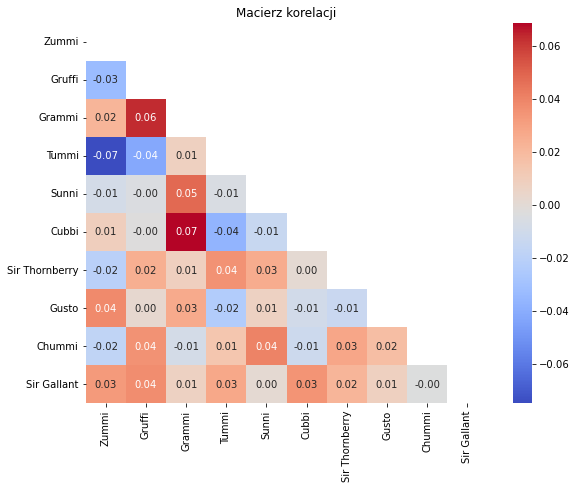

In [11]:
# Obliczanie podobieństwa cech
correlation_matrix = respondents.corr()

# Utworzenie maski dla górnej części trójkąta macierzy
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Konfiguracja rozmiaru wykresu
plt.figure(figsize=(9, 7))

# Wygenerowanie heatmapy macierzy korelacji
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Macierz korelacji")
plt.show()

Na macierzy nie widać dużej korelacji między kolumnami, więc nie jest możliwe ciekawsze imputowanie wartości.

### Jacy widzowie oglądają tych samych blogerów
Redukcja danych do 2 wymiarów i ich wyświetlenie.

In [12]:
df_transposed = respondents.transpose()

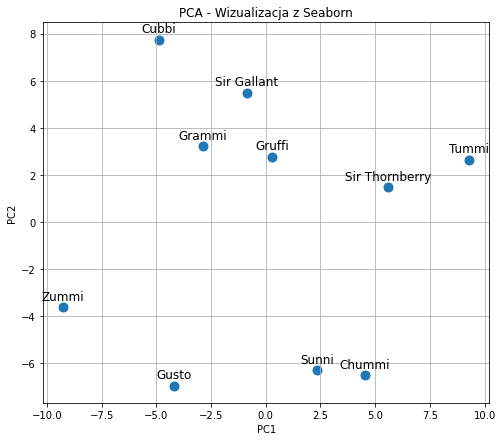

In [13]:
# PCA
pca = PCA(n_components=2)  # Określenie liczby komponentów
pca.fit(df_transposed)

# Transformacja danych
transformed_data = pca.transform(df_transposed)

# Konwersja danych do DataFrame
df_transformed = pd.DataFrame(transformed_data, columns=['PC1', 'PC2'], index=df_transposed.index)

# Wizualizacja z Seaborn
plt.figure(figsize=(8, 7))
sns.scatterplot(x='PC1', y='PC2', data=df_transformed, s=120)

# Dodanie etykiet
for i, txt in enumerate(df_transformed.index):
    plt.annotate(txt, (df_transformed['PC1'][i], df_transformed['PC2'][i]+ 0.3), ha='center', fontsize=12)

plt.title('PCA - Wizualizacja z Seaborn')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

Z wykresu można zauważyć że niektórzy blogerzy są bardziej podobni do siebie pod względem reklamy produktu P1. Na przykład wielu tych samych respondentów widziało produkt P1 u blogerów "Sunni" i "Chummi". Można tę informację wykorzystać do budowy szybkiego systemu, który nie daje idealnego rozwiązania, ale wykorzystuje dystans tych osób w przestrzeni wielowymiarowej i znajduje osoby najbardziej od siebie oddalone.

### Ilu respondentów nie widziało produktu P1?

In [14]:
# Sumowanie występowania wierszy z samymi zerami
(respondents == 0).all(axis=1).sum()

2

Dwóch respondentów z ankiety nie widziało produktu P1 ani razu. Nie pomogą oni później w analizie ale też nie zaszkodzą złożoności czasowej algorytmów bo jest ich za mało.

### Ile wynosi zasięg wybranego gumisia-blogera (każdego z osobna)?

In [15]:
def calculate_bloggers_range(*args):
    # Fukcja do obliczania zasięgu blogerów
    # (Sumowanie ile respondentów widziało produkt P1 u każdego z blogerów)
    total_range = 0
    for blogger in args:
        total_range |= respondents[blogger]
        
    return total_range.astype(int).sum() / 10

In [16]:
# Obliczenie indywidualnego zasięgu dla każdego blogera
range_of_gummies = calculate_bloggers_range(list(respondents.columns))

for name, value in range_of_gummies.items():
    print(f"{name :17} {value} = {value}%")

Zummi             46.3 = 46.3%
Gruffi            46.5 = 46.5%
Grammi            41.6 = 41.6%
Tummi             45.7 = 45.7%
Sunni             46.9 = 46.9%
Cubbi             43.8 = 43.8%
Sir Thornberry    44.7 = 44.7%
Gusto             44.6 = 44.6%
Chummi            45.2 = 45.2%
Sir Gallant       46.2 = 46.2%


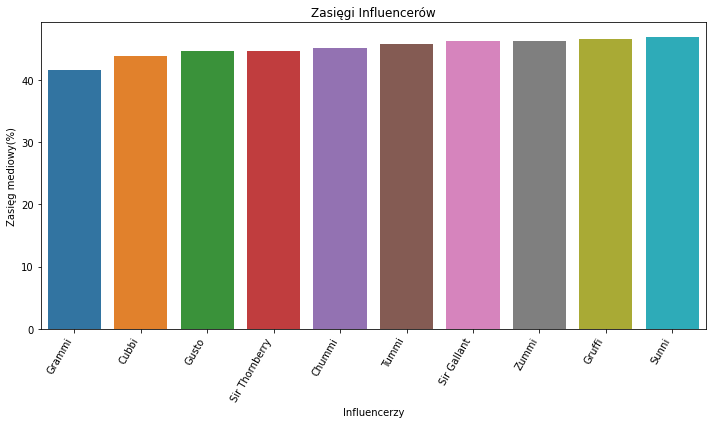

In [17]:
# Sortowanie zasięgów blogerów
sorted_range = range_of_gummies.sort_values()

# Tworzenie wykresu słupkowego o zasięgach influencerów
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_range.index, y=sorted_range)
plt.title('Zasięgi Influencerów')
plt.xlabel('Influencerzy')
plt.ylabel('Zasięg mediowy(%)')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

Tak jak widać na wykresie najmniejszy zasięg mają tacy blogerzy jak: 'Grammi', 'Cubbi', 'Gusto' a największy 'Sunni', 'Gruffi' i 'Zummi'

### Ile wynosi łączny zasięg wybranego podzbioru blogerów: 'Sunni', 'Gruffi' i 'Zummi'?

In [18]:
# Obliczanie zasięgu dla blogerów 'Sunni', 'Gruffi' i 'Zummi'
SunniGruffiZummi_range = calculate_bloggers_range('Sunni','Gruffi','Zummi')

# Sumowanie ciągu daje nam wynik zasięgu tych podzbioru blogerów
print("Blogerzy Sunni, Gruffi i Zummi mają łączny zasięg:", SunniGruffiZummi_range, "%")

Blogerzy Sunni, Gruffi i Zummi mają łączny zasięg: 85.0 %


Jak widać trzech najbardziej "zasięgowych" blogerów daje nam zasięg równy <b>85%</b>.

### Których 5 wybranych influencerów powinno wybrać przedsiębiorstwo do przeprowadzenia promocji produktu P2, tak by maksymalizować zasięg swojej kampanii?

Istnieje 252 różnych sposobów utworzenia grupy z 5 osób spośród 10.<br>
Nie jest to duża liczba a danych nie jest też dużo, więc można wykorzystać najprostrzą z metod "brute force" sprawdzając wszystkie możliwe kombinacje.<br>
Przy większej ilości blogerów lepiej skorzystać z innych technik, takich jak: Algorytm Najdalszego sąsiada, Przeszukiwanie lokalne, Algorytmy metaheurystyczne, Programowanie liniowe.

#### Przegląd wszystkich możliwych kobinacji influencerów 

In [19]:
# Lista influencerów
influencers = respondents.columns

# Najlepszy wynik i najlepsza kombinacja
best_score = 0
best_combination = None

# Generowanie wszystkich kombinacji influencerów
combinations = itertools.combinations(influencers, 5)

# Iteracja przez wszystkie kombinacje
for combo in combinations:
    # Obliczenie łącznego zasięgu dla danej kombinacji
    combination_score = calculate_bloggers_range(combo[0], combo[1], combo[2], combo[3], combo[4])
    # Update najlepszego wyniku i kombinacji
    if combination_score > best_score:
        best_score = combination_score
        best_combination = combo

# Wyświetlenie najlepszej kombinacji i wyniku
print("Najlepsza kombinacja influencerów:", best_combination)
print("Najlepszy łączny zasięg:", best_score, "%")

Najlepsza kombinacja influencerów: ('Zummi', 'Gruffi', 'Tummi', 'Sir Thornberry', 'Gusto')
Najlepszy łączny zasięg: 96.7 %


Influencerzy: <b>'Zummi', 'Gruffi', 'Tummi', 'Sir Thornberry', 'Gusto'</b> łącznie mają największy zasięg wynoszący <b>96,7%</b> dlatego oni powinni zostać wybrani do przeprowadzenia promocji produktu P2

### Jaka byłaby rekomendacja w przypadku 3 influencerów, wśród których na pewno musi znaleźć się influencer 'Tummi'?

Tu również zastosuje tą samą metodę, posiadając już kod troche go zmodyfikuję.

#### Przegląd wszystkich możliwych kobinacji influencerów

In [20]:
# Wybieramy bloggera który musi się znaleźć w danej grupie
WYBRANY_INFLUENCER = "Tummi"

# Lista influencerów z usunięciem 'Tummi'
influencers = respondents.columns.drop([WYBRANY_INFLUENCER])

# Najlepszy wynik i najlepsza kombinacja
best_score = 0
best_combination = None

# Generowanie wszystkich kombinacji influencerów
combinations = itertools.combinations(influencers, 2)

# Iteracja przez wszystkie kombinacje
for combo in combinations:
    # Obliczenie łącznego zasięgu dla danej kombinacji z "Tummi"
    combination_score = calculate_bloggers_range(combo[0], combo[1], WYBRANY_INFLUENCER)
    # Aktualizacja najlepszego wyniku i kombinacji
    if combination_score > best_score:
        best_score = combination_score
        best_combination = combo

# Dodanie 'Tummi' do tupla best_combination
best_combination += ("Tummi",)

# Wyświetlenie najlepszej kombinacji i wyniku
print("Najlepsza kombinacja influencerów:", best_combination)
print("Najlepszy łączny zasięg:", best_score, "%")

Najlepsza kombinacja influencerów: ('Zummi', 'Gruffi', 'Tummi')
Najlepszy łączny zasięg: 86.6 %


W przypadku 3 influencerów, wśród których na pewno musi znaleźć się influencer 'Tummi' powinni zostać dodani <b>'Zummi' i 'Gruffi'</b> aby zmaksymalizować zasięg kampanii do <b>86,6%</b>.